
# Fine Grained Image Classification - Stanford Dog Dataset
<!-- ## Abstract -->


#Import Stanfords Dog Datasets 
The original data source is found on http://vision.stanford.edu/aditya86/ImageNetDogs/.

The Stanford Dogs Dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization.

In [1]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/lists.tar

!sudo tar xvf images.tar
!sudo tar xvf annotation.tar
!sudo tar xvf lists.tar

Streaming output truncated to the last 5000 lines.
Annotation/n02108089-boxer/n02108089_1575
Annotation/n02108089-boxer/n02108089_1619
Annotation/n02108089-boxer/n02108089_1626
Annotation/n02108089-boxer/n02108089_1654
Annotation/n02108089-boxer/n02108089_1672
Annotation/n02108089-boxer/n02108089_1675
Annotation/n02108089-boxer/n02108089_1690
Annotation/n02108089-boxer/n02108089_1748
Annotation/n02108089-boxer/n02108089_1757
Annotation/n02108089-boxer/n02108089_1775
Annotation/n02108089-boxer/n02108089_1859
Annotation/n02108089-boxer/n02108089_1912
Annotation/n02108089-boxer/n02108089_1956
Annotation/n02108089-boxer/n02108089_200
Annotation/n02108089-boxer/n02108089_2007
Annotation/n02108089-boxer/n02108089_2056
Annotation/n02108089-boxer/n02108089_2106
Annotation/n02108089-boxer/n02108089_2355
Annotation/n02108089-boxer/n02108089_2360
Annotation/n02108089-boxer/n02108089_2367
Annotation/n02108089-boxer/n02108089_2432
Annotation/n02108089-boxer/n02108089_2482
Annotation/n02108089-boxer

# Installing and Importing Libraries

In [31]:
import os
import xml.etree.ElementTree as ET

import pandas as pd
import numpy as np

from PIL import Image
import random


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import glob
from fastai.vision import *

from skimage.transform import resize

#Variable
Creating Directory to store Images and Annotations.

In [10]:
epochs = 100
batch_size = 100
testsplit = .2
targetx = 224
targety = 224
learning_rate = 0.0001
classes = 120
seed = random.randint(1, 1000)
random_seed = 42

IMAGES_DIR = "/content/Images/"
ANNOTATIONS_DIR = "/content/Annotation/"

List down all 120 breeds

In [11]:
data = ImageDataBunch.from_folder(IMAGES_DIR, valid_pct=0.2, size=244, ds_tfms=get_transforms(), bs=4).normalize(imagenet_stats)
print(data.classes)
len(data.classes), data.c

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

(120, 120)

Number of sample with respect to Breeds

In [12]:
labels_csv = pd.read_csv('/content/labels.csv')
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

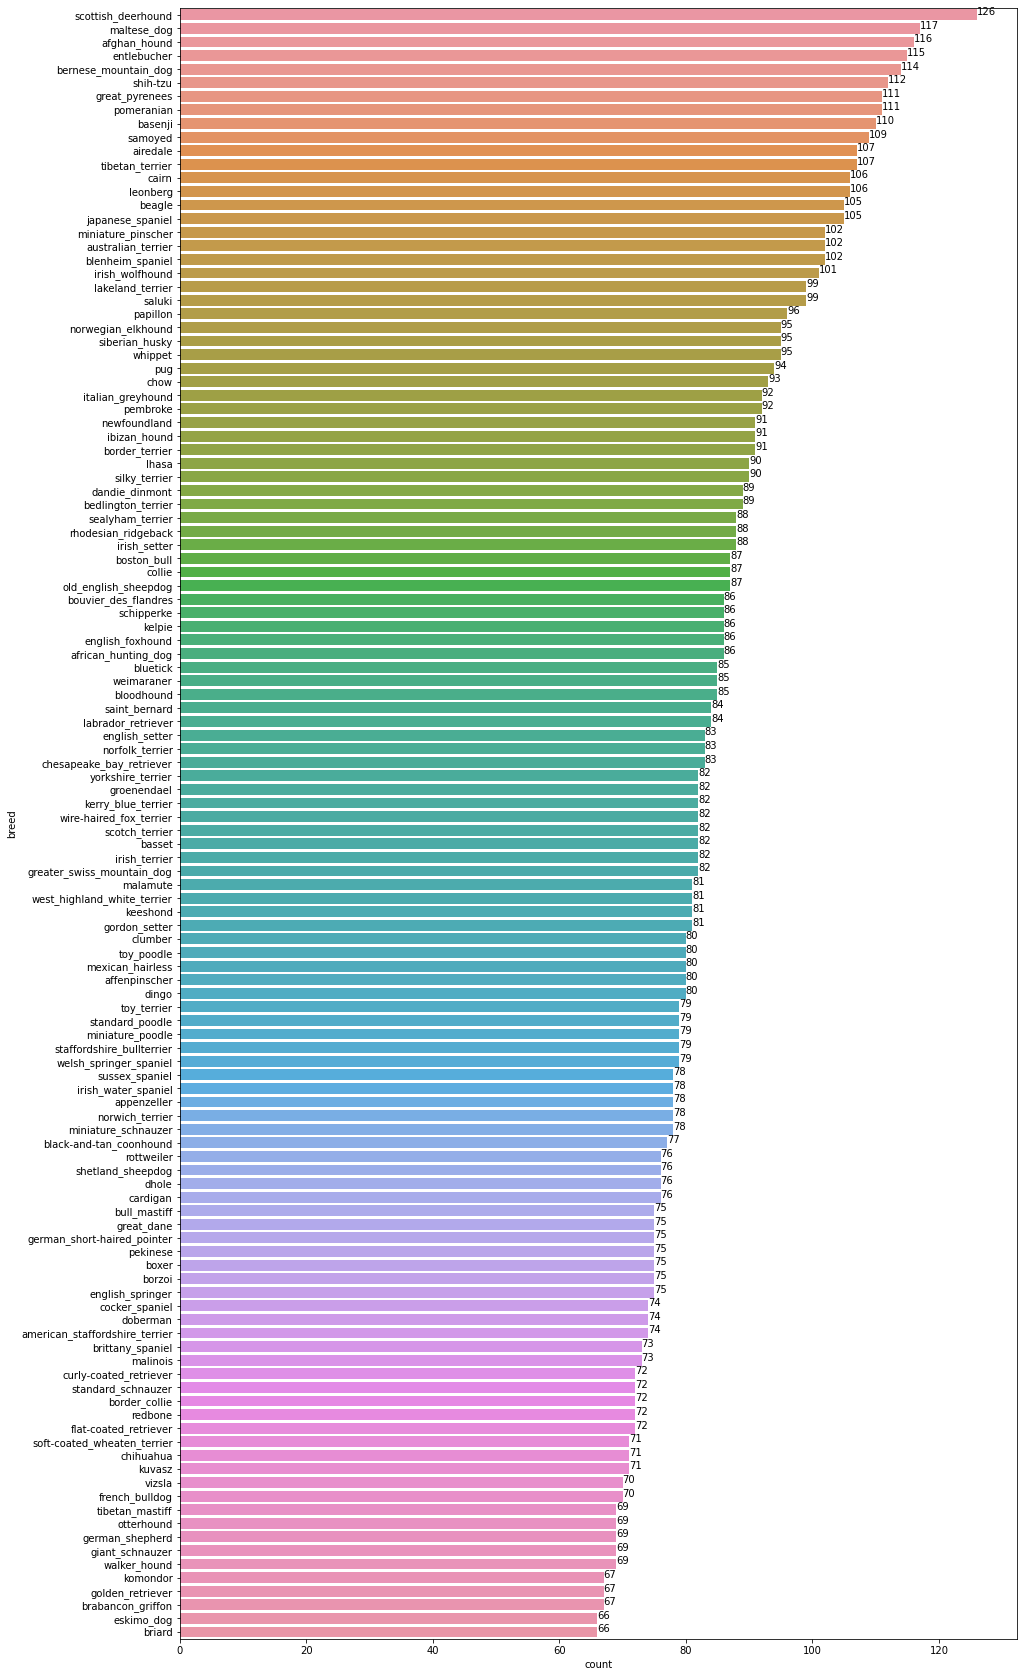

In [13]:
def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        
#finding top dog brands
plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=labels_csv['breed'],order=labels_csv['breed'].value_counts().index)
barw(ax0)
plt.show()

# Dataset

Contents of the dataset:

Number of categories: 120
Number of images: 20,580
Annotations: Class labels, Bounding boxes

Approach 1 :

Assigning and displaying 120 breeds in array format from the IMAGES_DIR.

In [14]:
def show_dir_images(breed, n_to_show):
    plt.figure(figsize=(32,32))
    img_dir = "/content/Images/{}/".format(breed)
    images = os.listdir(img_dir)[:n_to_show]
    for i in range(n_to_show):
        img = mpimg.imread(img_dir + images[i])
        plt.subplot(n_to_show/4+1, 4, i+1)
        plt.imshow(img)
        plt.axis('off')

n02086910-papillon


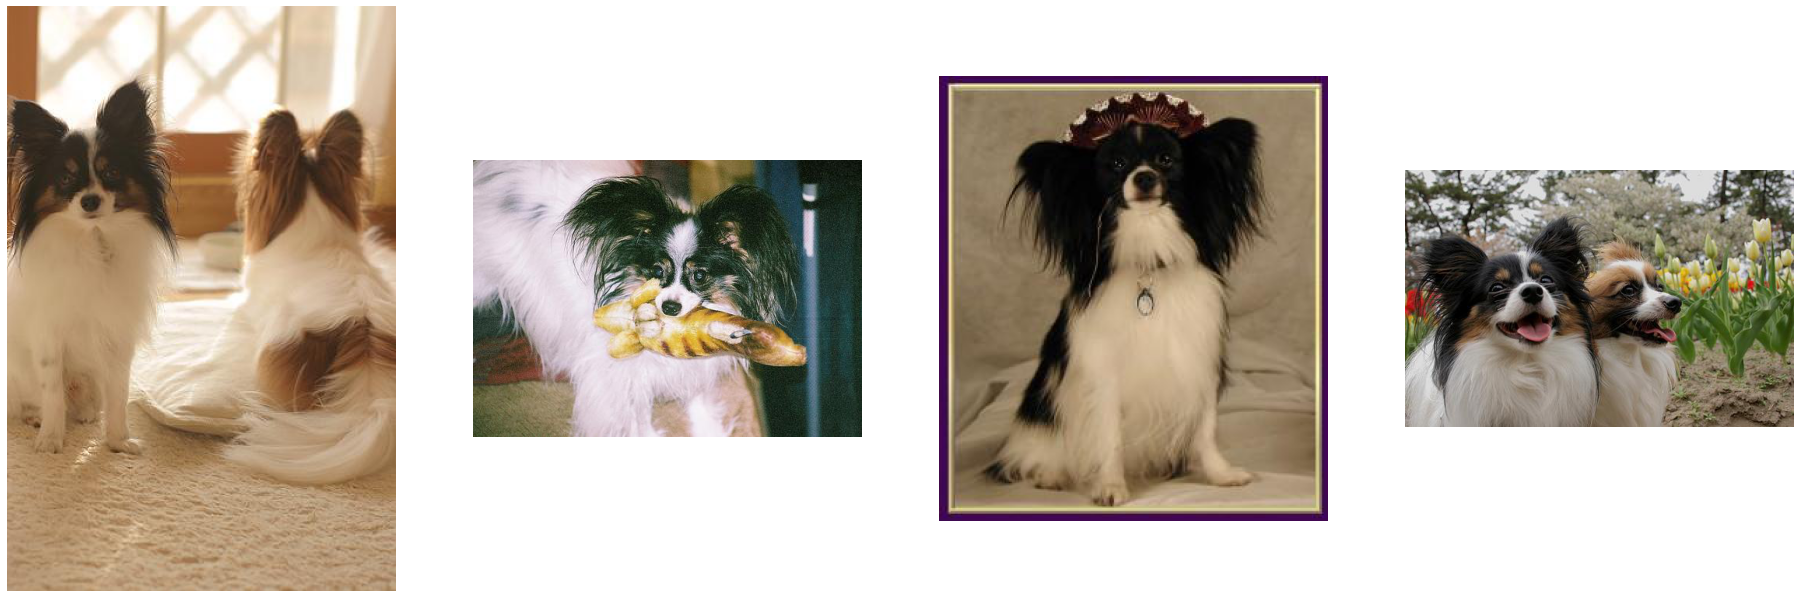

In [21]:
print(os.listdir(IMAGES_DIR)[61])
show_dir_images(os.listdir(IMAGES_DIR)[61], 4)

Approach 2:

Displaying 50 breeds and its corresponding images.

In [22]:
img_width, img_height = 224,224
channels = 3
num_images= 50

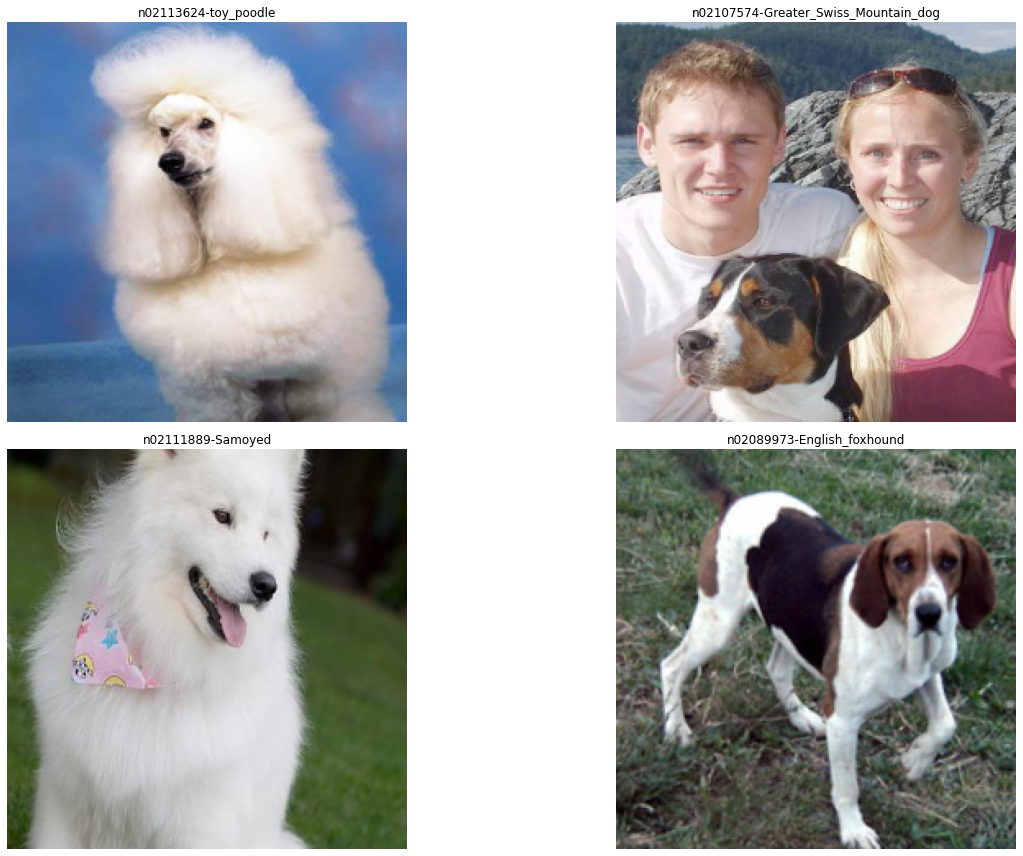

In [24]:
data.show_batch(rows=5, figsize=(20,12))

In [25]:
def get_images(image_dir):

    image_index = 0
    image_arr_size= img_width * img_height * channels
    images = np.ndarray(shape=(num_images, image_arr_size))
    labels = np.array([])                       

    for type in os.listdir(image_dir)[:50]:
        type_images = os.listdir(image_dir + type)
        labels= np.append(labels, type.split('-')[1])
        
        for image in type_images[:1]:
            image_file = os.path.join(image_dir, type + '/', image)
            image_data = mpimg.imread(image_file)
            image_resized = resize(image_data, (img_width, img_height), anti_aliasing=True)
            images[image_index, :] = image_resized.flatten()
            print (type, ':', image)
            image_index += 1

    return (images, labels)

Sample images of 50 different categories from the dataset:

n02089078-black-and-tan_coonhound : n02089078_188.jpg
n02088632-bluetick : n02088632_3404.jpg
n02093256-Staffordshire_bullterrier : n02093256_5600.jpg
n02113186-Cardigan : n02113186_741.jpg
n02105855-Shetland_sheepdog : n02105855_7893.jpg
n02111277-Newfoundland : n02111277_6229.jpg
n02089867-Walker_hound : n02089867_1599.jpg
n02116738-African_hunting_dog : n02116738_5956.jpg
n02096585-Boston_bull : n02096585_1403.jpg
n02107312-miniature_pinscher : n02107312_7212.jpg
n02108422-bull_mastiff : n02108422_278.jpg
n02106030-collie : n02106030_7453.jpg
n02098105-soft-coated_wheaten_terrier : n02098105_2846.jpg
n02097658-silky_terrier : n02097658_9017.jpg
n02113799-standard_poodle : n02113799_1727.jpg
n02093859-Kerry_blue_terrier : n02093859_879.jpg
n02099429-curly-coated_retriever : n02099429_3276.jpg
n02094433-Yorkshire_terrier : n02094433_2041.jpg
n02102480-Sussex_spaniel : n02102480_105.jpg
n02097209-standard_schnauzer : n02097209_3366.jpg
n02107574-Greater_Swiss_Mountain_dog : n02107574_1

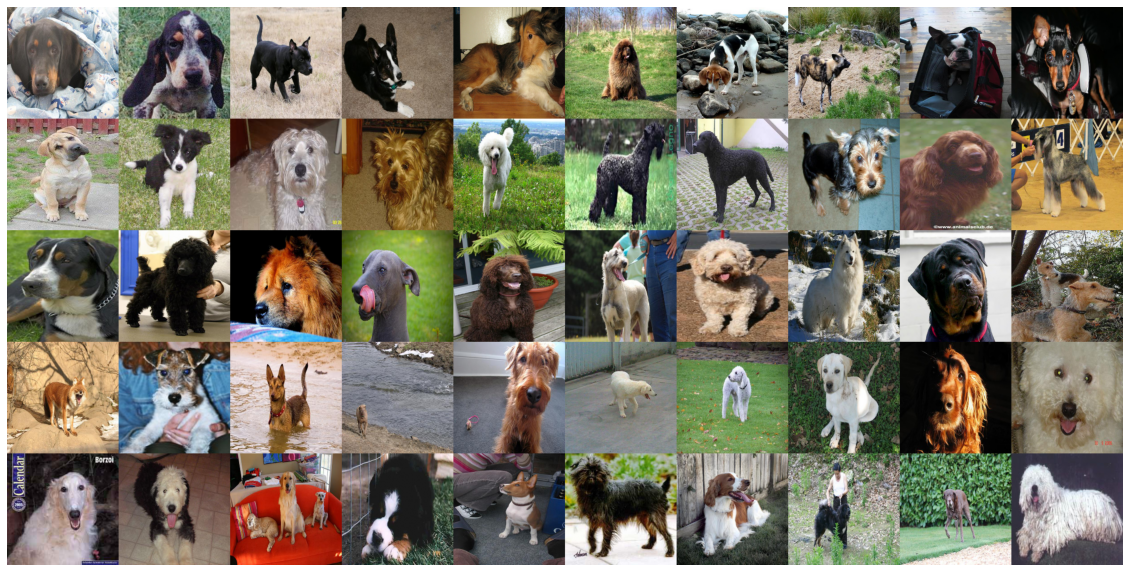

In [27]:
def plot_images(instances, images_per_row=10, **options):

    size = img_width
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(img_width, img_height, channels) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((img_width, img_height * n_empty)))
    for row in range(n_rows):
        if (row == len(instances)/images_per_row):
            break
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.figure(figsize=(20,20))
    plt.imshow(image, **options)
    plt.axis("off")
    # plt.savefig('dogs_images.png', transparent= True, bbox_inches= 'normal', dpi= 900)
    plt.show()

images, labels = get_images(IMAGES_DIR)
plot_images(images)

# Descriptive Analysis 
Data Exploration

When the script is initially run, the dataset is downloaded to a local folder (by default the project root folder). Some stats are printed, and an initial visualization is saved to show the images and their classes. The data is split into batches (default batch size is 64)

In [28]:
# Retrieving annotations
def create_df_from_annotations(annotation_path):
    annotations_dic = {}
    filename = []
    database = []
    width = []
    height = []
    depth = []
    segment = []
    name = []
    pose = []
    truncated = []
    difficult = []
    xmin = []
    xmax = []
    ymin = []
    ymax = []

    for annotation_breed_folder_name in os.listdir(ANNOTATIONS_DIR):
        annotation_breed_folder_path = os.path.join(ANNOTATIONS_DIR, annotation_breed_folder_name)
        for fname in os.listdir(annotation_breed_folder_path):
            annotation_fpath = os.path.join(annotation_breed_folder_path, fname)
            tree = ET.parse(annotation_fpath)
            filename.append(str(tree.getroot().findall('.//filename')[0].text))
            database.append(str(tree.getroot().findall('.//database')[0].text))
            width.append(int(tree.getroot().findall('.//width')[0].text))
            height.append(int(tree.getroot().findall('.//height')[0].text))
            depth.append(int(tree.getroot().findall('.//depth')[0].text))
            segment.append(int(tree.getroot().findall('.//segment')[0].text))
            name.append(str(tree.getroot().findall('.//name')[0].text))
            pose.append(str(tree.getroot().findall('.//pose')[0].text))
            truncated.append(str(tree.getroot().findall('.//truncated')[0].text))
            difficult.append(str(tree.getroot().findall('.//difficult')[0].text))
            xmin.append(int(tree.getroot().findall('.//xmin')[0].text))
            xmax.append(int(tree.getroot().findall('.//xmax')[0].text))
            ymin.append(int(tree.getroot().findall('.//ymin')[0].text))
            ymax.append(int(tree.getroot().findall('.//ymax')[0].text))

    annotations_dic = {'filename': filename,
                       'database': database, 
                       'width': width, 
                       'height': height, 
                       'depth': depth, 
                       'segment': segment, 
                       'name': name, 
                       'pose': pose, 
                       'truncated': truncated, 
                       'difficult': difficult, 
                       'xmin': xmin, 
                       'xmax': xmax, 
                       'ymin': ymin, 
                       'ymax': ymax}
    annotations_df = pd.DataFrame(data=annotations_dic)
    return annotations_df

In [32]:
annotations_df = create_df_from_annotations(ANNOTATIONS_DIR)

In [34]:
print(annotations_df)

             filename           database  width  height  ...  xmin  xmax ymin ymax
0      n02089078_4065  ImageNet database    350     354  ...   146   287   94  332
1      n02089078_3681  ImageNet database    353     265  ...   110   317   60  263
2       n02089078_965  ImageNet database    375     500  ...    63   227    2  453
3      n02089078_3188  ImageNet database    265     350  ...    22   248   18  349
4       n02089078_944  ImageNet database    384     340  ...     6   381    6  337
...               ...                ...    ...     ...  ...   ...   ...  ...  ...
20575    n02086240_30  ImageNet database    500     375  ...     2   499   49  374
20576  n02086240_9467  ImageNet database    500     476  ...    45   446    0  458
20577  n02086240_5443  ImageNet database    375     500  ...    66   302  118  310
20578  n02086240_1665  ImageNet database    333     500  ...   127   236  212  353
20579  n02086240_1725  ImageNet database    500     364  ...   255   492   16  256

[20

In [35]:
annotations_df.describe()

width        height  ...          ymin          ymax
count  20580.000000  20580.000000  ...  20580.000000  20580.000000
mean     442.531876    385.861224  ...     56.541351    354.171283
std      142.792308    124.863446  ...     59.406210    122.409322
min       97.000000    100.000000  ...      0.000000     90.000000
25%      361.000000    333.000000  ...     13.000000    289.000000
50%      500.000000    375.000000  ...     39.000000    339.000000
75%      500.000000    453.000000  ...     82.000000    399.000000
max     3264.000000   2562.000000  ...   1548.000000   2457.000000

[8 rows x 8 columns]

In [36]:
annotations_df['size_ratio'] = annotations_df['width']/annotations_df['height']
annotations_df['name'].value_counts().describe()

count    120.000000
mean     171.500000
std       23.220898
min      148.000000
25%      152.750000
50%      159.500000
75%      186.250000
max      252.000000
Name: name, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


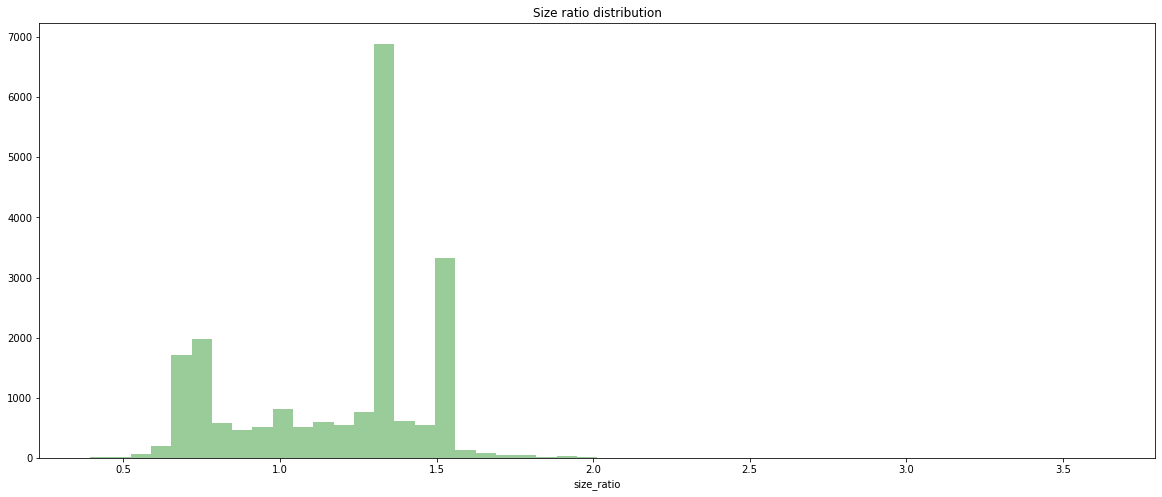

In [37]:
f, axes = plt.subplots(figsize=(20, 8))
sns.distplot(annotations_df['size_ratio'], kde=False, color= 'green')
axes.set_title('Size ratio distribution') 
plt.show()

#Images Size Distribution

In [38]:
files = !ls /content/Images/n02*/* | grep jpg

In [39]:
shapes = np.asarray([plt.imread( f ).shape for f in files])

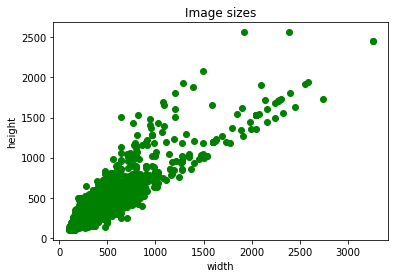

In [40]:
plt.plot(shapes[:, 1], shapes[:, 0], "o", color = 'green') 
plt.title("Image sizes")
plt.xlabel("width")
_ = plt.ylabel("height")